### Evaluating the dynamic of the phase gradient in Lauschke et al 2013

In Lauschke et al (2013), the authors claims that there is a period gradient scaling during segmentations in ex-vivo explants:

*Second, our quantifications indicate that the phase gradient evolves nonlinearly over time, with an exponential function describing the system accurately (Fig. 4b). This means that oscillations are slowing down exponentially throughout the entire culture period (with the exception of the most posterior mPSM location; Supplementary Fig. 4). *


**Here we argue that such conclusion is incorrect and that based on their data, the authors cannot exclude a static period gradeint during segmentation. **

paper reference (Lauschke et al, 2013): https://doi.org/10.1038/nature11804

In [1]:
import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd
from scipy import stats

cmap = plt.cm.get_cmap('Blues')
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_context('notebook', font_scale=1.7, rc={'lines.linewidth': 1.3, 'axes.facecolor': 'white'})

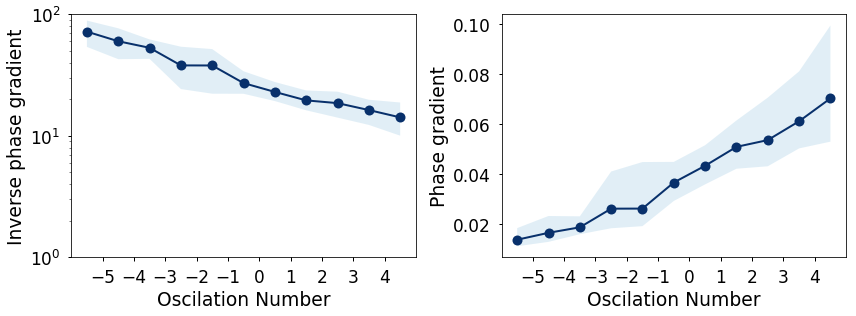

In [2]:
# Loading digitalized data from (Lauschke et al 2013)
D = pd.read_csv('./experimental_data/Lauschke_data/Fig4b_complete.csv' , index_col=None, header=0)


# Plotting the data as represented in the manuscript and in the normal scale, where the area represents the standard deviation.
fig = plt.subplots(1, 2, figsize=(2*6.0, 4.5), sharey=False)
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
    
ax1.plot(D['OscNumber'], D['Mean'], 'o-', ms=10, lw=2.0, c=cmap(1.0))
ax1.fill_between(D['OscNumber'], D['Stdlow'], D['Stdhigh'], alpha=0.2, facecolor=cmap(0.5))      
ax1.set_yscale('log')
ax1.set_yticks([1, 10, 100])
ax1.set_xticks(np.arange(-5, 5, 1))
ax1.set_xlim([-6, 5])
ax1.set_ylabel('Inverse phase gradient')
ax1.set_xlabel('Oscilation Number')

ax2.plot(D['OscNumber'], 1./D['Mean'], 'o-', ms=10, lw=2.0, c=cmap(1.0))
ax2.fill_between(D['OscNumber'], 1./D['Stdlow'], 1./D['Stdhigh'], alpha=0.2, facecolor=cmap(0.5))      
ax2.set_xticks(np.arange(-5, 5, 1))
ax2.set_xlim([-6, 5])
ax2.set_ylabel('Phase gradient')
ax2.set_xlabel('Oscilation Number')
plt.tight_layout()

#### Lets now find the best linear fit that fit the experimental data

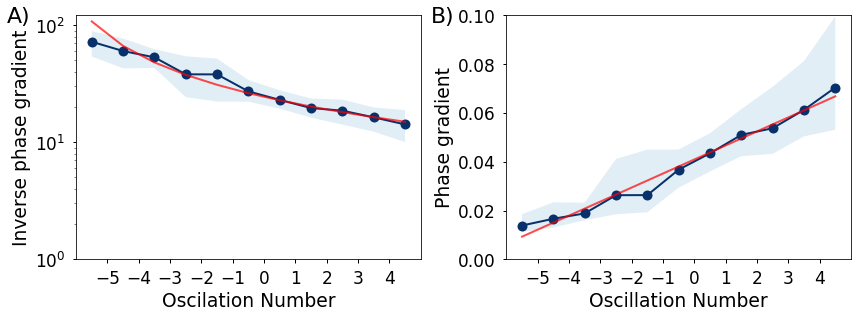

In [3]:
# linear fit that fits the best on the linear scale
slope, intercept, r_value, p_value, std_err = stats.linregress(D['OscNumber'], 1.0/D['Mean'])    
x = np.arange(-5.5,5.5, 1)

# Plotting the data as represented in the manuscript, where the area represents the standard deviation.
fig = plt.subplots(1, 2, figsize=(2*6.0, 4.5), sharey=False)
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax1.text(-.20, 0.97, 'A)',transform=ax1.transAxes, size=22)
ax1.plot(D['OscNumber'], D['Mean'], 'o-', ms=10, lw=2.0, c=cmap(1.0))
ax1.plot(x, 1.0/(slope*x + intercept), 'r', lw=2.0, alpha=0.7)
ax1.fill_between(D['OscNumber'], D['Stdlow'], D['Stdhigh'], alpha=0.2, facecolor=cmap(0.5))      
ax1.set_yscale('log')
ax1.set_yticks([1, 10, 100])
ax1.set_xticks(np.arange(-5, 5, 1))
ax1.set_xlim([-6, 5])
ax1.set_ylabel('Inverse phase gradient')
ax1.set_xlabel('Oscilation Number')

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
ax2.text(-.22, 0.97, 'B)',transform=ax2.transAxes, size=22)   
ax2.plot(D['OscNumber'], 1./D['Mean'], 'o-', ms=10, lw=2.0, c=cmap(1.0))
ax2.plot(x, slope*x + intercept, 'r', lw=2.0, alpha=0.7)
ax2.fill_between(D['OscNumber'], 1./D['Stdlow'], 1./D['Stdhigh'], alpha=0.2, facecolor=cmap(0.5))      
ax2.set_xticks(np.arange(-5, 5, 1))
ax2.set_xlim([-6, 5])
ax2.set_ylim([0, 0.1])
ax2.set_ylabel('Phase gradient')
ax2.set_xlabel('Oscillation Number')
plt.tight_layout()
#plt.savefig('./PeriodGradientLauschke.pdf')